# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts Using Neural Networks.

**Install** TensorFlow Text

In [ ]:
pip install tensorflow_text


**Import** the main packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# ML Packs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



Read the training data.

In [ ]:
df = pd.read_csv("training_data.csv")
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
X0 = df["sentence"].to_numpy()
y0 = df["difficulty"] 

Read the unlabelled test data, on which to make predictions.

In [ ]:
df_unlab = pd.read_csv("/content/unlabelled_test_data.csv")
X1 = df_unlab["sentence"].to_numpy()
df_unlab.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


The tensorflow package needs the final labels to be numbers, so we use Ordinal Encoding, wich both encode the CEFR labels into numbers and translates the idea of order into the model.

In [ ]:
oe = OrdinalEncoder()
oe.set_params(categories= [['A1', 'A2', 'B1',"B2","C1","C2"]])
v = y0.to_numpy().reshape(-1,1)
y0=pd.DataFrame(oe.fit_transform(v).reshape(4800),columns=["difficulty"])
print(y0.head())
oe.categories

   difficulty
0         4.0
1         0.0
2         0.0
3         0.0
4         2.0


[['A1', 'A2', 'B1', 'B2', 'C1', 'C2']]

This is the Encoder used to embed the text to vector, it transforms any sentence in a vector containing a total of 512 values, which are used as feaures to develop the predictive model. Below is an example of its working. 

In [ ]:
embed_1 = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3") 

In [ ]:
embed_1(["bounjour","je suis Victor","je suis Bárbara"])

<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[ 0.15410367,  0.02259252, -0.06771642, ...,  0.04396355,
        -0.00034422,  0.00912832],
       [ 0.05661429, -0.0159746 , -0.04966923, ..., -0.03720944,
         0.03255781, -0.02770253],
       [ 0.04085764, -0.05375427,  0.02218219, ..., -0.04173596,
         0.03280498,  0.00813196]], dtype=float32)>

In order to generate the feature vectors we need to convert the phareses dataframe column into a list, and then apply the transformer to this new data structure. We do this for the labeled data and the unlabeled data as well. 

In [ ]:
a= X0.tolist()
b = X1.tolist()

In [ ]:
X = pd.DataFrame(np.concatenate((embed_1(a[0:2000]).numpy(),embed_1(a[2000:4000]).numpy(),embed_1(a[4000:4801]).numpy())))
y = y0
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.076948,0.068267,-0.063916,0.036478,0.020098,-0.036513,0.033314,-0.036877,-0.009478,0.055526,...,0.102068,-0.037674,-0.017124,-0.031497,0.007614,0.023139,0.055571,0.013198,-0.000869,-0.051946
1,-0.058682,0.016926,-0.080679,0.035441,-0.039885,0.000980,-0.003663,-0.054643,-0.073032,-0.014359,...,0.021383,0.039472,-0.051039,-0.046419,0.015408,0.002966,-0.058434,-0.005122,-0.050829,-0.012926
2,-0.011889,-0.002370,0.062653,-0.036361,-0.023909,-0.026624,-0.048723,0.028527,0.013396,-0.012739,...,0.032707,-0.018201,0.025419,0.066617,-0.051649,0.067689,0.022049,0.004865,-0.012903,-0.069997


In [ ]:
X_unlab= pd.DataFrame(embed_1(b[0:1201]).numpy())
X_unlab.head(3)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.034290,-0.010744,-0.029123,-0.003844,0.061831,0.032971,0.014195,0.077017,0.015406,0.017614,...,-0.030730,0.032611,0.002972,-0.044229,-0.020724,-0.035705,-0.007965,0.040871,-0.005444,0.035547
1,0.032688,-0.041312,-0.024782,0.001032,-0.113101,0.016476,0.034519,0.015644,-0.105159,-0.051077,...,0.021044,-0.018432,-0.043395,0.026769,-0.025460,-0.058796,0.053560,-0.089027,0.006905,0.012517
2,-0.053744,-0.037155,0.043402,0.014010,0.078404,0.011575,-0.091309,-0.057628,-0.020308,0.079215,...,-0.056173,0.064812,-0.023039,-0.033962,-0.014347,-0.067600,-0.063112,0.019112,-0.027499,0.053020


Now we perform the train,validation and test split in order to better train the model.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=0)

X_train.shape,X_test.shape,X_valid.shape



((3840, 512), (384, 512), (576, 512))

In [ ]:
def df_to_dataset(dataframe,y_t, shuffle=True, batch_size=30):
  df = dataframe.copy()
  #labels = df.pop('difficulty')
  df = df
  ds = tf.data.Dataset.from_tensor_slices((df, y_t))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
bs = 5 # 15 foi um valor muito bom
x_tr = df_to_dataset(X_train,y_t=y_train,shuffle=True,batch_size = bs)
x_te = df_to_dataset(X_test,y_t=y_test,shuffle=True,batch_size = bs)
x_va = df_to_dataset(X_valid,y_t=y_valid,shuffle=True,batch_size = bs)

## Neural Networks

This model architecture was developed afeter trial and errors attempts. It is composed of 3 interspread layers of dense neurons and dropout layers, followed by a layer of six neurons (one for each label) activated by a sigmoid function  

In [ ]:

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1064,activation="relu"),
                            tf.keras.layers.Dropout(0.6),
                            tf.keras.layers.Dense(516,activation="relu"),
                            tf.keras.layers.Dropout(0.6),
                            tf.keras.layers.Dense(64,activation="relu"),
                            tf.keras.layers.Dropout(0.4),
                            tf.keras.layers.Dense(6,activation = "sigmoid") 
                            
                            ])

In this section we compile the model by defining an optimzer, a loss function, and the metric(s) that we want to follow during the training process.

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),loss = "SparseCategoricalCrossentropy",
              metrics = ["accuracy"]
              )

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

Now the number of epochs are defined in order to train the model for a specific ammount of times. 

Epoch 1/15
768/768 [==============================] - 36s 45ms/step - loss: 1.7653 - accuracy: 0.2326 - val_loss: 1.6469 - val_accuracy: 0.3733
Epoch 2/15
768/768 [==============================] - 35s 45ms/step - loss: 1.4907 - accuracy: 0.3557 - val_loss: 1.2845 - val_accuracy: 0.4375
Epoch 3/15
768/768 [==============================] - 38s 50ms/step - loss: 1.3145 - accuracy: 0.4125 - val_loss: 1.2038 - val_accuracy: 0.5000
Epoch 4/15
768/768 [==============================] - 33s 43ms/step - loss: 1.2387 - accuracy: 0.4508 - val_loss: 1.1623 - val_accuracy: 0.5226
Epoch 5/15
768/768 [==============================] - 43s 56ms/step - loss: 1.1748 - accuracy: 0.4904 - val_loss: 1.1324 - val_accuracy: 0.5278
Epoch 6/15
768/768 [==============================] - 41s 53ms/step - loss: 1.1250 - accuracy: 0.5169 - val_loss: 1.1153 - val_accuracy: 0.5191
Epoch 7/15
768/768 [==============================] - 41s 54ms/step - loss: 1.0839 - accuracy: 0.5432 - val_loss: 1.1007 - val_accuracy:

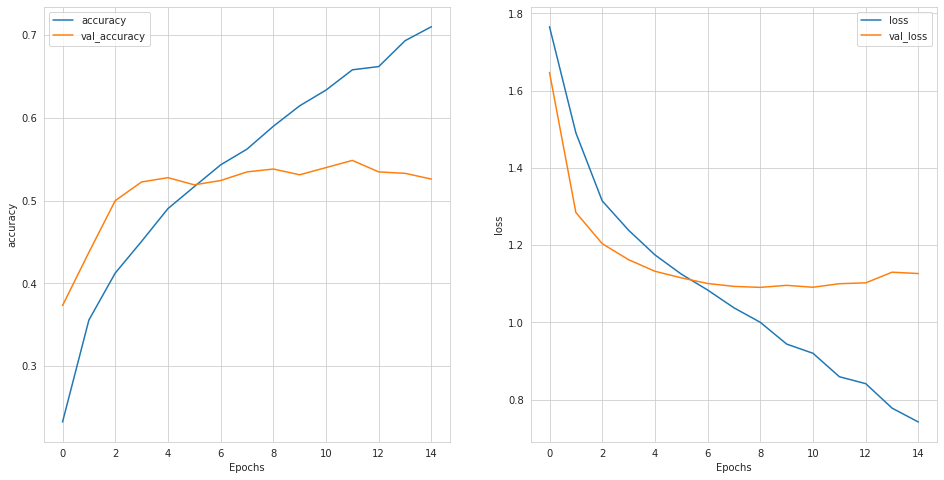

In [ ]:
history = model.fit(x_tr,epochs = 15,validation_data = x_va)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.show()

In [ ]:
def evaluate(true, pred):
    global precision,recall,f1
    precision = precision_score(true, pred, average='weighted')
    recall = recall_score(true, pred, average='weighted')
    f1 = f1_score(true, pred, average='weighted')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [ ]:
model.evaluate(x_te)

77/77 [==============================] - 2s 22ms/step - loss: 1.2135 - accuracy: 0.5339


[1.2134504318237305, 0.5338541865348816]

In [ ]:
pred = model.predict(X_unlab)
pred
pred[0].argmax()

38/38 [==============================] - 1s 27ms/step


5

In [ ]:
labels = pd.DataFrame(np.argmax(pred,axis=1),columns=["difficulty"])
labels["difficulty"] = labels["difficulty"].map({0:"A1",1:"A2",2:"B1",3:"B2",4:"C1",5:"C2"})
labels["id"] = labels.index
labels=labels[["id","difficulty"]]
labels.head()

,id,difficulty
0,0,C2
1,1,A2
2,2,B1
3,3,A2
4,4,C2


In [ ]:
pred_ = model.predict(X_test)
pred_
labels_ = pd.DataFrame(np.argmax(pred_,axis=1),columns=["difficulty"])

12/12 [==============================] - 0s 29ms/step


In [ ]:
evaluate(y_test,labels_["difficulty"])


CONFUSION MATRIX:
[[52  5  4  1  1  1]
 [20 18 20  3  0  1]
 [ 2  8 41  9  2  2]
 [ 0  1  6 32  9  9]
 [ 3  1  1 15 31 20]
 [ 4  0  8 10 12 32]]
ACCURACY SCORE:
0.5365
CLASSIFICATION REPORT:
	Precision: 0.5372
	Recall: 0.5365
	F1_Score: 0.5254


In [ ]:
labels.to_csv('subimission_nn10.csv',index=False)